In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.population_model as pop
import lbg_forecast.noise as noise
import lbg_forecast.selection as sel
import lbg_forecast.nz_sim as nz
import os
from getdist import plots, MCSamples

In [2]:
def numpy_to_mcsamples(array, names, label):
    "convenience function used for plotting using getdist"
    samples = np.copy(array)
    samples[:, -1] = np.log10(samples[:, -1])
    samples[:, 8] = np.log10(samples[:, 8])
    return MCSamples(samples=samples, names=names, label=label)

def plot_samples(all, u, g, r):
    "plot triangle plot for sps parameters"
    plotter = plots.get_subplot_plotter()
    names = pop.sps_parameter_names()#["zred", "logzsol", "dust1", "dust2", "dust_index", 
            #          "igm_factor", "gas_logu", "logfagn", "agn_tau",
            #           "logf1", "logf2", "logf3", "logf4", "logf5","logf6", "logmass"]
    
    s1 = numpy_to_mcsamples(all, names, label = "global population")
    s2 = numpy_to_mcsamples(u, names, label = "u-dropouts")
    s3 = numpy_to_mcsamples(g, names, label = "g-dropouts")
    s4 = numpy_to_mcsamples(r, names, label = "r-dropouts")
    
    plotter.triangle_plot([s1, s2, s3, s4], Filled=False, contour_lws=2, colors=["black", "blue", "red", "green"], contour_colors=["black", "blue", "red", "green"])

In [3]:
nprocess = 1
nruns = 1
total_files = nprocess*nruns
sps_parameters = []
photometry = []
spectra = []
for file in range(total_files):
    sps_parameters.append(np.load("simulation_data/sps_parameters_"+str(file)+".npy"))
    photometry.append(np.load("simulation_data/simulated_photometry_"+str(file)+".npy"))
    spectra.append(np.load("simulation_data/spectra_"+str(file)+".npy"))
sps_parameters = np.vstack(sps_parameters)
photometry = np.vstack(photometry)

In [4]:
sps_parameters

array([[ 6.48400843e+00, -2.13262827e+00,  1.65454073e+00, ...,
        -3.28355876e+00, -3.71674370e+00,  1.43371979e+11],
       [ 1.03986710e+01, -9.62185625e-01,  7.75349732e-01, ...,
         3.51776407e+00,  7.47269606e-01,  1.69037438e+07],
       [ 1.24193828e+00,  4.46142141e-01,  3.31263974e-01, ...,
         2.60688907e+00,  1.68451320e+00,  6.34236234e+08],
       ...,
       [ 9.31466576e+00, -6.72770304e-01,  1.97849618e+00, ...,
         2.39746953e+00,  1.03013070e+00,  3.36881679e+12],
       [ 1.28767454e+01, -1.54969035e+00,  2.75618878e-01, ...,
         4.75869355e+00,  3.23704465e+00,  9.56713448e+08],
       [ 1.29753531e+01, -2.26317934e+00,  1.67468908e+00, ...,
        -2.08591746e-01,  2.93420656e+00,  5.03010391e+07]])

In [5]:
sources = noise.get_noisy_magnitudes(sps_parameters, photometry, random_state=42)
colours = sel.colours(sources)
uparams, gparams, rparams = nz.apply_cuts(colours, return_all_params=True)
gparams.shape

(77, 17)

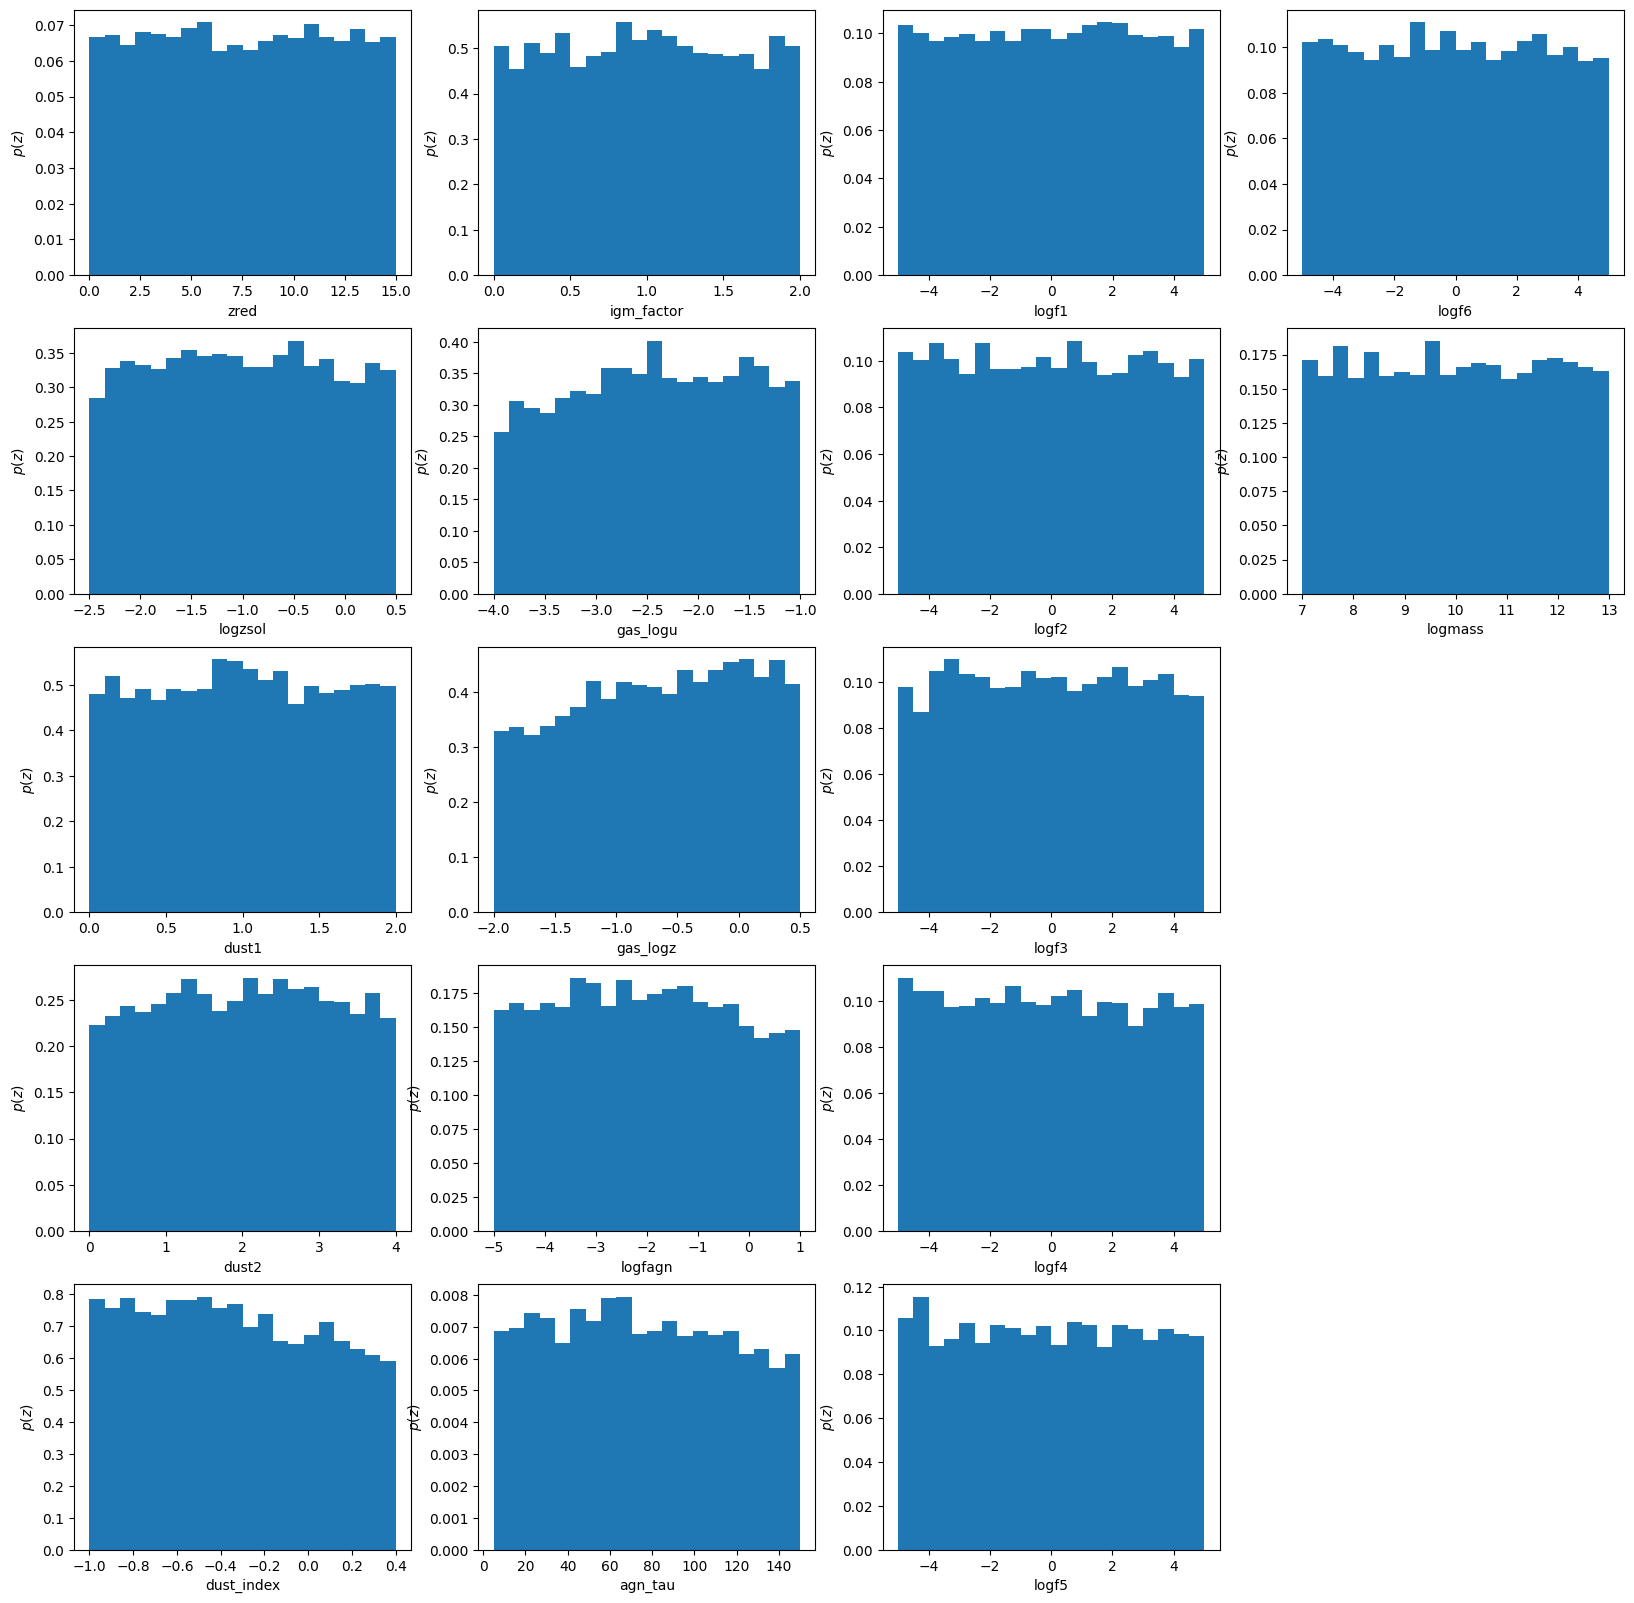

In [6]:
pop.plot_galaxy_population(sps_parameters)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


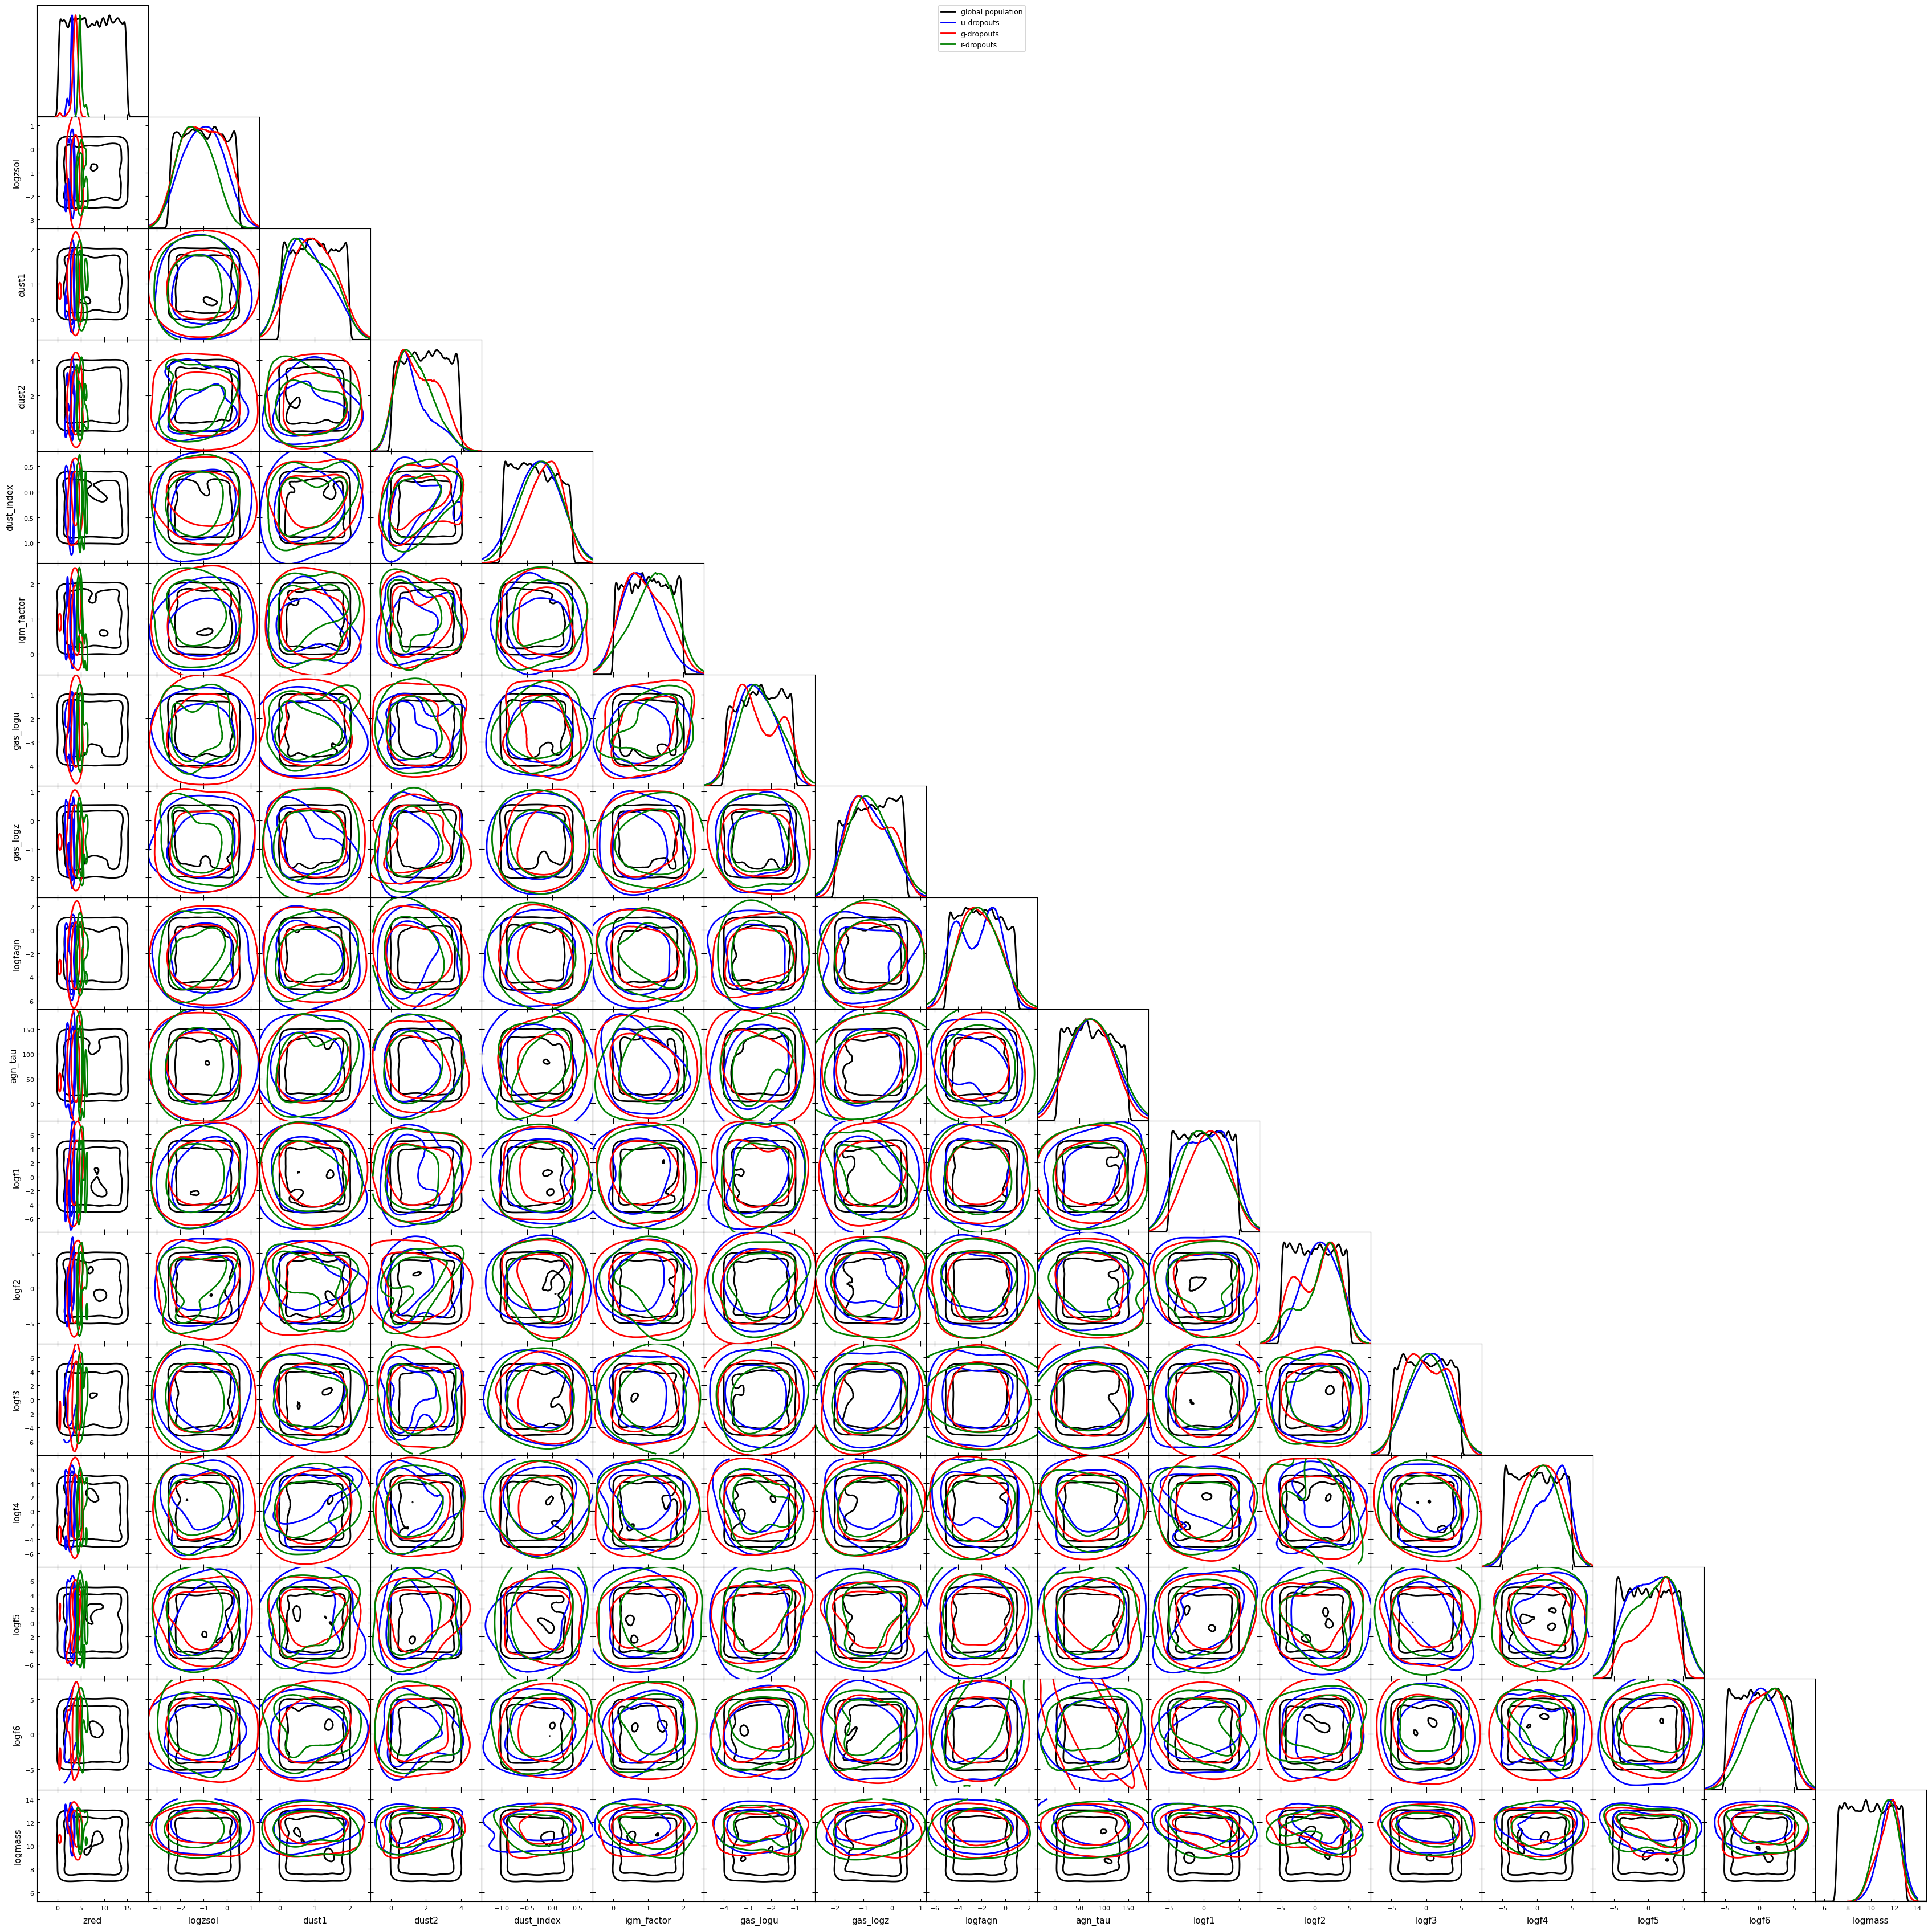

In [7]:
plot_samples(sps_parameters, uparams, gparams, rparams)